# Generating GEXF graph from JSON

After scraping groups data from Whatsapp Web to a json file, follow the steps below to create a GEXF graph file.

In [36]:
GROUPS_DATA_PATH = 'data.json'  # Replace with your json file path
OUTPUT_GEXF_PATH = 'graph.gexf' # Path to save graph

### Importing stuff

In [ ]:
import json
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm

### Reading data

In [ ]:
with open(GROUPS_DATA_PATH, mode='r', encoding='utf-8') as f:
    data = json.load(f)

In [ ]:
for group in data.values():  # Showing groups names
    print(group["group_name"])

### Building graph

In [ ]:
G = nx.Graph()
groups = list(data.values())[:5]

In [ ]:
print("Creating graph...")
for group in tqdm(groups):
    participants_cpy = group["participants"][:]
    for participant in group["participants"]:
        participants_cpy.remove(participant)
        for neighbor in participants_cpy:
            if G.has_edge(participant, neighbor):
                G[participant][neighbor]["weight"] += 1
            else:
                G.add_edge(participant, neighbor, weight=1)

### Graph preview

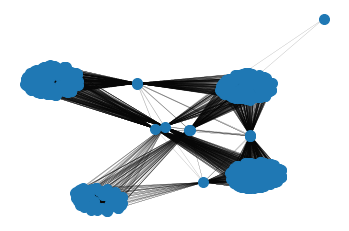

In [35]:
pos = nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=100)

# edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges,
                       width=0.1)
plt.axis('off')
plt.show()

### Saving graph

In [ ]:
nx.write_gexf(G, OUTPUT_GEXF_PATH)